In [1]:
import pylab as pl
#import scipy as sp
#from scipy.linalg import eig
import numpy as np
from numpy.linalg import eig
from numpy.random import multivariate_normal as mvn
import pdb

/home/yerassyl/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
def make_data_twoclass(N=100):

    # generates some toy data
    mu = [np.array([0, 3]), np.array([0, -3])]
    S = np.array([[5, 4], [4, 5]])

    # Generate data for each class
    X_class1 = mvn(mu[0], S, N // 2).T
    X_class2 = mvn(mu[1], S, N // 2).T
    X = np.hstack((X_class1, X_class2))
    y = np.hstack((np.zeros(N // 2), np.ones(N // 2)))

    colors = "brymcwg"
    fig = pl.figure(figsize=(6,5))
    fig.clf()
    for ic in np.unique(y):
        idx = y == int(ic)
        pl.plot(X[0,idx], X[1,idx], colors[int(ic)]+'o')
        pl.axis('tight')

    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')
    pl.ylim((-8,8))
    pl.xlim((-8,8))
    pl.show()

    return X,y

In [3]:
def fit_logreg(X,Y,its,eta):
    D,N = X.shape[0],X.shape[1]
    # how many classes? 
    K = 1
    # add bias to X
    Xo = np.vstack([np.ones(N), X])
    # init W
    W = np.zeros((D + 1, K))

    for it in np.arange(its):
        rn = np.random.randint(N)
        # do the prediction for that point:
        yhat = 1 / (1 + np.exp(-W.T @ Xo[:, rn]))  
        err = yhat - Y[rn]
        W -= eta * err * Xo[:, rn].reshape(-1, 1)
    return W

def predict_logreg(x,W):
    yhat = 1 / (1 + np.exp(-W.T @ x))
    return yhat



In [ ]:
def make_plot_logreg(X,Y,W):
  
    fig = pl.figure(figsize=(5,4))
    fig.clf()
    colors = "brymcwg"
    
    # Plot the decision boundary.
    h = .05 # stepsize in mesh
    x_min, x_max = X[0,:].min() - 1, X[0,:].max() + 1
    y_min, y_max = X[1,:].min() - 1, X[1,:].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = predict_logreg(np.c_[np.ones(xx.ravel().shape[-1]), xx.ravel(), yy.ravel()].T,W)
    Z = Z.reshape(xx.shape)
    
    cs = pl.contourf(xx, yy, Z, cmap=pl.cm.bwr, alpha=.5)
    pl.axis('tight')
    pl.clim(0., 1.)
    pl.colorbar()
    pl.axis('equal')

    y = Y.argmax(axis=0)
    for ic in np.unique(Y):
        idx = Y == int(ic)
        pl.plot(X[0,idx], X[1,idx], colors[int(ic)]+'o')

    pl.axis('tight')
    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')
    pl.title('Logistic Regression')
    pl.show()

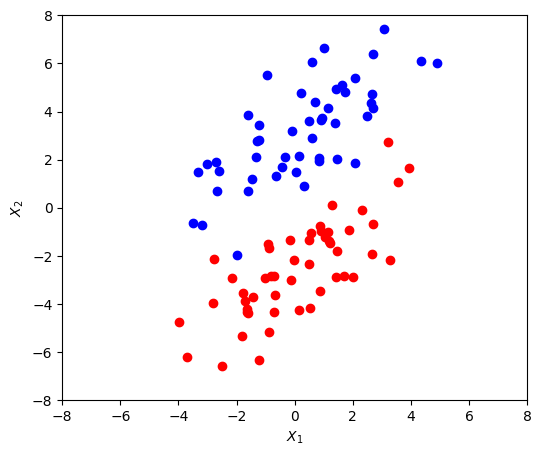

<Figure size 640x480 with 0 Axes>

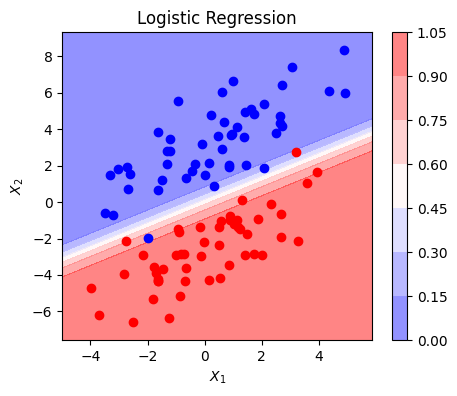

<Figure size 640x480 with 0 Axes>

In [5]:
if __name__ == '__main__':
    X,y = make_data_twoclass()
    Wlogreg = fit_logreg(X,y,40,1.)
    make_plot_logreg(X,y,Wlogreg)